In [156]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [2]:
df_true = pd.read_csv("../input/fake-and-real-news-dataset/True.csv")
df_fake = pd.read_csv("../input/fake-and-real-news-dataset/Fake.csv")

In [3]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
df_true = df_true.drop(['subject','date'], axis=1)
df_true.head()

,title,text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...


In [6]:
df_fake = df_fake.drop(['subject','date'], axis=1)
df_fake.head()

,title,text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...


In [19]:
c_read = pd.read_csv("../input/fake-and-real-news-dataset/True.csv")
c_true = c_read['subject']
c_1 = c_true.replace(['politicsNews','worldnews'],'True')
c_1 = c_1.rename('Status')
c_1.head()

0    True
1    True
2    True
3    True
4    True
Name: Status, dtype: object

In [41]:
c_read = pd.read_csv("../input/fake-and-real-news-dataset/Fake.csv")
c_true = c_read['subject']
c_2 = c_true.replace(['News','Government News','politics','left-news','US_News'],'Fake')
c_2 = c_2.rename('Status')
c_2.head()

0    Fake
1    Fake
2    Fake
3    Fake
4    Fake
Name: Status, dtype: object

In [42]:
df_1 = pd.concat([df_true,c_1],axis=1)
df_1.head()

,title,text,Status
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,True


In [43]:
df_2 = pd.concat([df_fake,c_2],axis=1)
df_2.head()

,title,text,Status
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,Fake


In [100]:
from sklearn.utils import shuffle
df = pd.concat([df_1,df_2])
df = df.rename(columns={'title':'Title','text':'Content'})
df = df.replace({'Status': {'Middle-east': 'Fake'}})
new_df = df[{'Title','Status'}]
temp_df = df[{'Content','Status'}]
new_df = new_df.rename(columns={'Title':'Content'})
df_final = pd.concat([new_df,temp_df])
df_final = shuffle(df_final)
df_final = df_final.reset_index(drop=True)
df_final.head()

,Content,Status
0,JERUSALEM (Reuters) - U.S. President Donald Tr...,True
1,David Plouffe was a Campaign Manager and Senio...,Fake
2,BREAKING: SCHIZOPHRENIC COMMANDER IN CHIEF Sen...,Fake
3,Mr Fast and Furious fired back at President ...,Fake
4,TOKYO (Reuters) - Japanese Prime Minister Shin...,True


In [101]:
df_final.isnull().sum()

Content    0
Status     0
dtype: int64

In [102]:
import plotly.express as px
fig = px.pie(df_final, names='Status', title ='Pie chart of fake and real news')
fig.show()

<AxesSubplot:xlabel='count', ylabel='Status'>

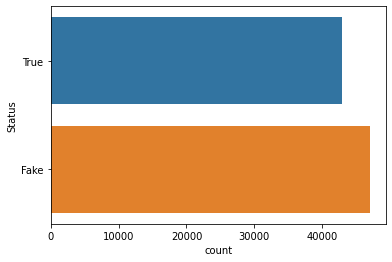

In [103]:
sns.countplot(data=df_final, y="Status")

In [104]:
df_final['Status'] = df_final['Status'].map({'True':1.0,'Fake':0.0})
df_final.head()

,Content,Status
0,JERUSALEM (Reuters) - U.S. President Donald Tr...,1.0
1,David Plouffe was a Campaign Manager and Senio...,0.0
2,BREAKING: SCHIZOPHRENIC COMMANDER IN CHIEF Sen...,0.0
3,Mr Fast and Furious fired back at President ...,0.0
4,TOKYO (Reuters) - Japanese Prime Minister Shin...,1.0


In [139]:
import nltk
nltk.download('omw-1.4')
import re 
import string
string.punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def process(text):
    text = text.lower()
    text = "".join([i for i in text if i not in string.punctuation])
    text = re.split('D+',text)
    text = "".join([t for t in text if t not in stopwords.words('english')])
    return text
    

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [140]:
print(df_final['Content'][0])
print(process(df_final['Content'][0]))

JERUSALEM (Reuters) - U.S. President Donald Trump informed Palestinian President Mahmolud Abbas on Tuesday that he intends to move the U.S. Embassy to Jerusalem, Abbas s spokesman said. The statement did not say whether Trump elaborated on the  timing of such a move.  President Mahmoud Abbas received a telephone call from U.S. President Donald Trump in which he notified the President (Abbas) of his intention to move the American embassy from Tel Aviv to Jerusalem,  spokesman Nabil Abu Rdainah said in a statement. The statement did not say whether Trump elaborated on the  timing of such a move.  President Abbas warned of the dangerous consequences such a decision would have to the peace process and to the peace, security and stability of the region and of the world,  Abu Rdainah said. 
jerusalem reuters  us president donald trump informed palestinian president mahmolud abbas on tuesday that he intends to move the us embassy to jerusalem abbas s spokesman said the statement did not say w

In [141]:
X = list(map(process, df_final['Content']))

In [142]:
print(X[0])

jerusalem reuters  us president donald trump informed palestinian president mahmolud abbas on tuesday that he intends to move the us embassy to jerusalem abbas s spokesman said the statement did not say whether trump elaborated on the  timing of such a move  president mahmoud abbas received a telephone call from us president donald trump in which he notified the president abbas of his intention to move the american embassy from tel aviv to jerusalem  spokesman nabil abu rdainah said in a statement the statement did not say whether trump elaborated on the  timing of such a move  president abbas warned of the dangerous consequences such a decision would have to the peace process and to the peace security and stability of the region and of the world  abu rdainah said 


In [144]:
y = df_final['Status']

In [173]:
vocab_size = 5000
max_len = 30

In [174]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
token = Tokenizer(num_words=vocab_size)
token.fit_on_texts(X)

X = token.texts_to_sequences(X)

In [175]:
X =  pad_sequences(X,padding='pre',truncating='pre',maxlen=max_len)

In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,shuffle=True)

In [179]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dropout,Dense
model = Sequential([
    Embedding(vocab_size,100,input_length=max_len),
    Dropout(0.2),
    LSTM(200),
    Dropout(0.2),
    Dense(1,activation='relu')
])

In [180]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

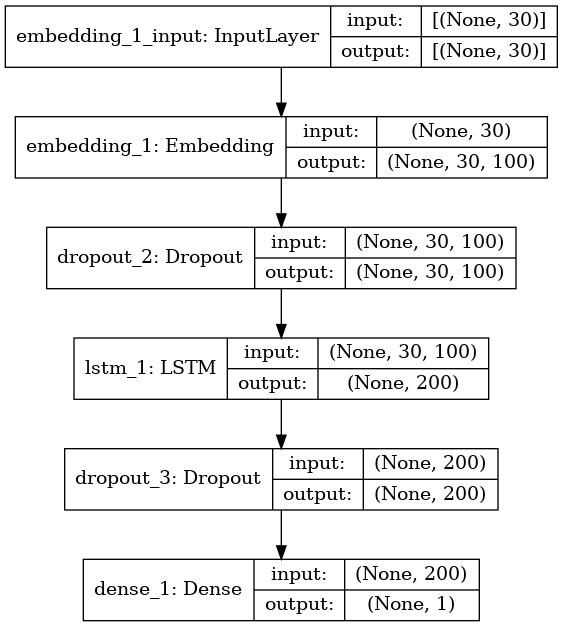

In [181]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [162]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 100)           500000    
_________________________________________________________________
dropout (Dropout)            (None, 30, 100)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 200)               240800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 741,001
Trainable params: 741,001
Non-trainable params: 0
_________________________________________________________________


In [183]:
results =  model.fit(X_train,y_train,epochs=8,batch_size=32,validation_data=(X_test,y_test))

2022-10-16 04:13:17.175864: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/8
1965/1965 [==============================] - 130s 64ms/step - loss: 0.3695 - acc: 0.8770 - val_loss: 0.2920 - val_acc: 0.8820
Epoch 2/8
1965/1965 [==============================] - 126s 64ms/step - loss: 0.2376 - acc: 0.9347 - val_loss: 0.2496 - val_acc: 0.9222
Epoch 3/8
1965/1965 [==============================] - 124s 63ms/step - loss: 0.2194 - acc: 0.9424 - val_loss: 0.2698 - val_acc: 0.9387
Epoch 4/8
1965/1965 [==============================] - 125s 64ms/step - loss: 0.2004 - acc: 0.9546 - val_loss: 0.2897 - val_acc: 0.9439
Epoch 5/8
1965/1965 [==============================] - 125s 64ms/step - loss: 0.1572 - acc: 0.9638 - val_loss: 0.3021 - val_acc: 0.9491
Epoch 7/8
1965/1965 [==============================] - 126s 64ms/step - loss: 0.1707 - acc: 0.9610 - val_loss: 0.7312 - val_acc: 0.8891
Epoch 8/8
1965/1965 [==============================] - 126s 64ms/step - loss: 0.1447 - acc: 0.9694 - val_loss: 0.3213 - val_acc: 0.9495


<AxesSubplot:title={'center':'Loss'}>

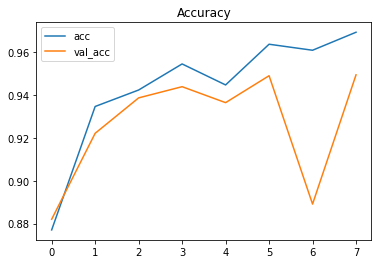

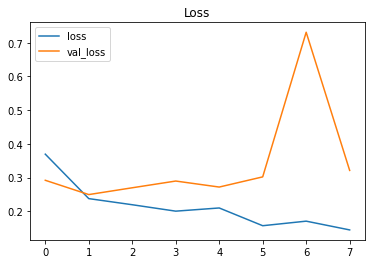

In [184]:
results_df = pd.DataFrame(results.history)
results_df[['acc','val_acc']].plot(title='Accuracy')
results_df[['loss','val_loss']].plot(title='Loss')

In [187]:
loss,acc = model.evaluate(X_test,y_test)

842/842 [==============================] - 14s 17ms/step - loss: 0.3213 - acc: 0.9495
